In [10]:
import pandas as pd
data = pd.read_csv("/content/Housing.csv")
print("Records {0} and attributes {1}".format(data.shape[0],data.shape[1]))
display(data.head(5))

Records 545 and attributes 13


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data PreProcessing

In [26]:
#Checking the null values
null_counts = data.isnull().sum()
print(null_counts)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
Target_Feature = ["price"]
Input_Feature = [i for i in list(data.columns) if i not in Target_Feature ]
Dependent_Feature = data[Target_Feature]
Independent_Feature = data[Input_Feature]

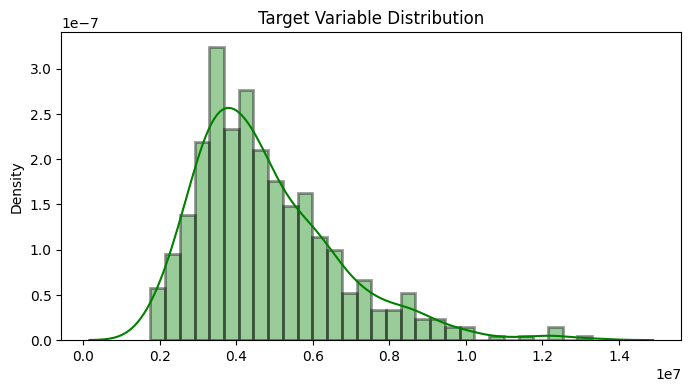

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,6]
plt.figure(figsize=[8,4])
sns.distplot(Dependent_Feature, color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

## Feature Engineering

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricaldata=Independent_Feature.select_dtypes(include=['object'])
categoricaldata["mainroad"] = le.fit_transform(categoricaldata["mainroad"])
categoricaldata["guestroom"] = le.fit_transform(categoricaldata["guestroom"])
categoricaldata["basement"] = le.fit_transform(categoricaldata["basement"])
categoricaldata["hotwaterheating"] = le.fit_transform(categoricaldata["hotwaterheating"])
categoricaldata["airconditioning"] = le.fit_transform(categoricaldata["airconditioning"])
categoricaldata["prefarea"] = le.fit_transform(categoricaldata["prefarea"])
categoricaldata["furnishingstatus"] = le.fit_transform(categoricaldata["furnishingstatus"])
categoricaldata.head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


In [44]:
continousdata=Independent_Feature.select_dtypes(exclude=['object'])
continousdata.head(5)

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [45]:
sampledataframe=pd.concat([continousdata,categoricaldata],axis=1)
sampledataframe.head(5)

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1
3,7500,4,2,2,3,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0


#Correlation

In [47]:
Correlation=sampledataframe.corr()
Correlation

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,-0.171445
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,-0.123244
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,-0.143559
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.104672
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,-0.177539
mainroad,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,-0.156726
guestroom,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,-0.118328
basement,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,-0.112831
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,-0.031628
airconditioning,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.150477


In [62]:
sampledataframe["price"]=Dependent_Feature
sampledataframe.head(5)

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price
0,7420,4,2,3,2,1,0,0,0,1,1,0,13300000
1,8960,4,4,4,3,1,0,0,0,1,0,0,12250000
2,9960,3,2,2,2,1,0,1,0,0,1,1,12250000
3,7500,4,2,2,3,1,0,1,0,1,1,0,12215000
4,7420,4,1,2,2,1,1,1,0,1,0,0,11410000


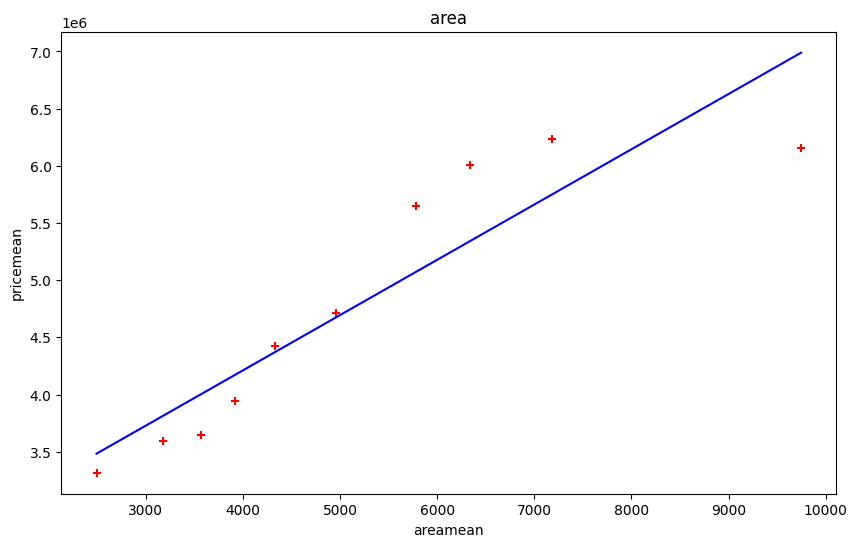

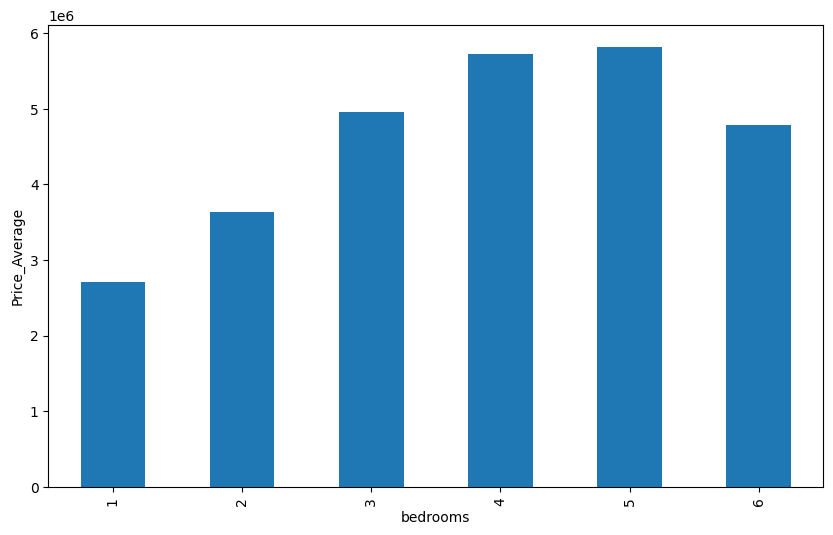

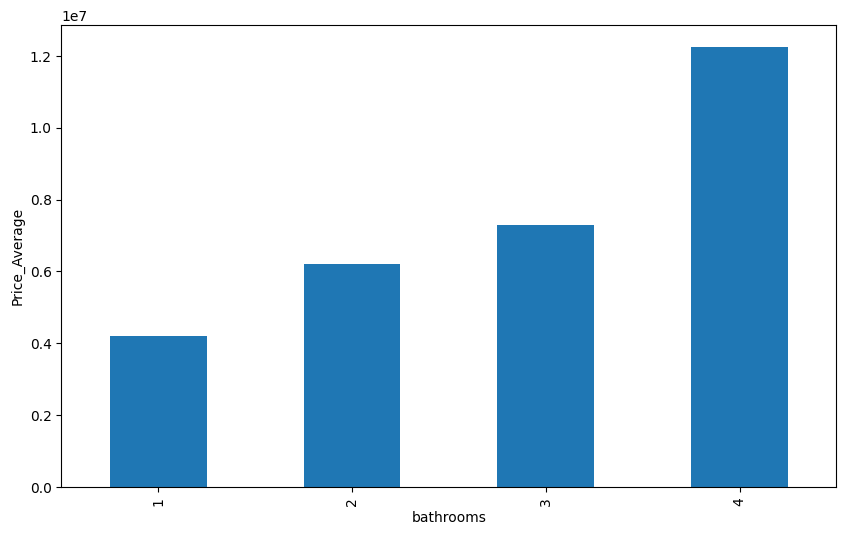

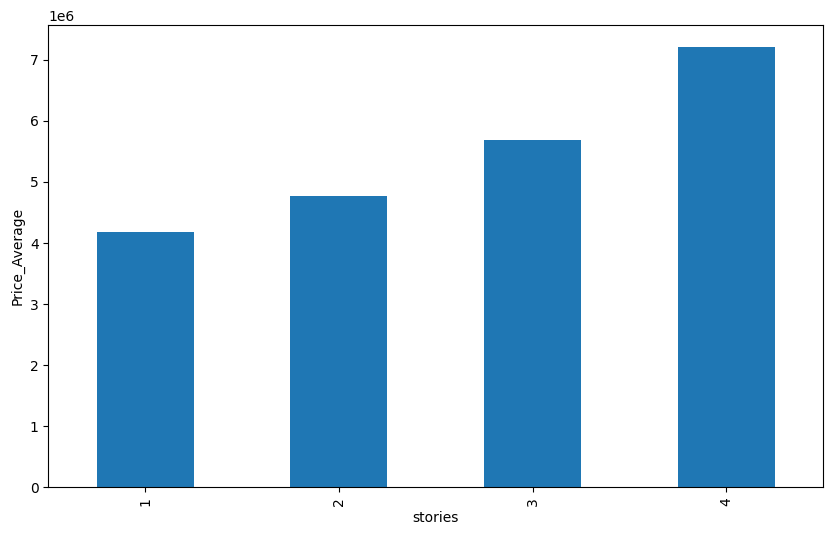

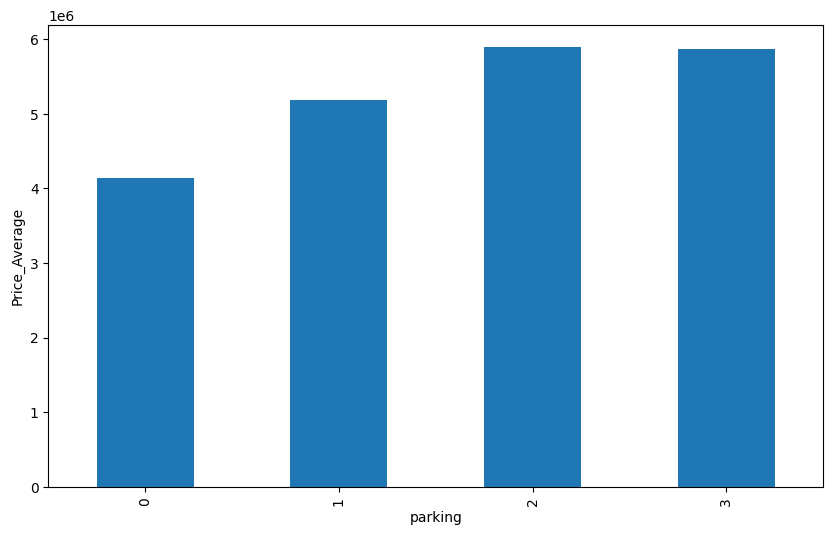

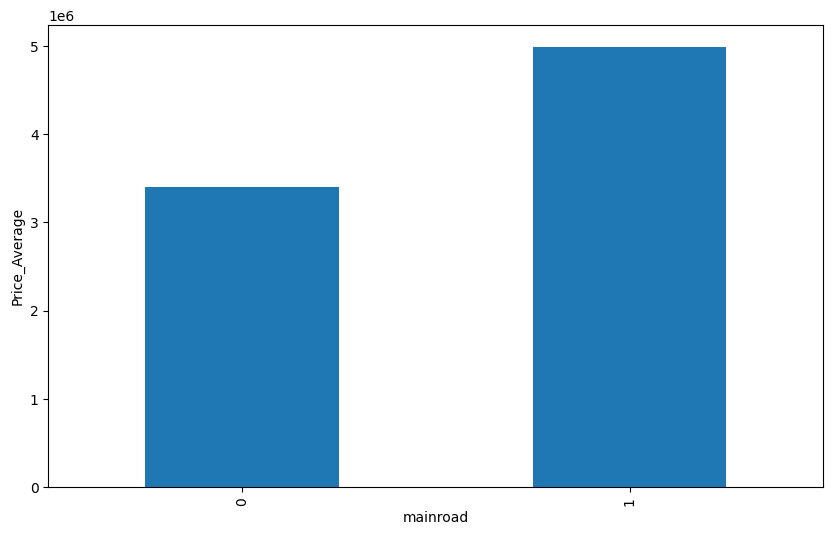

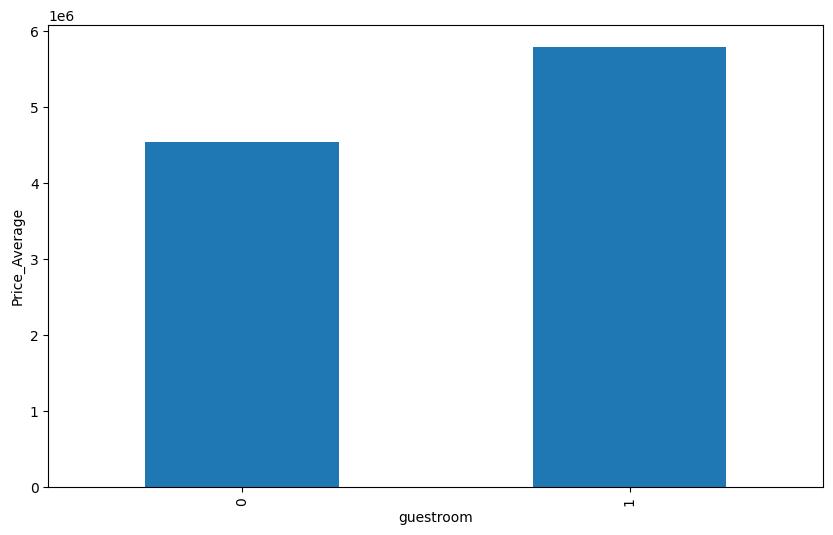

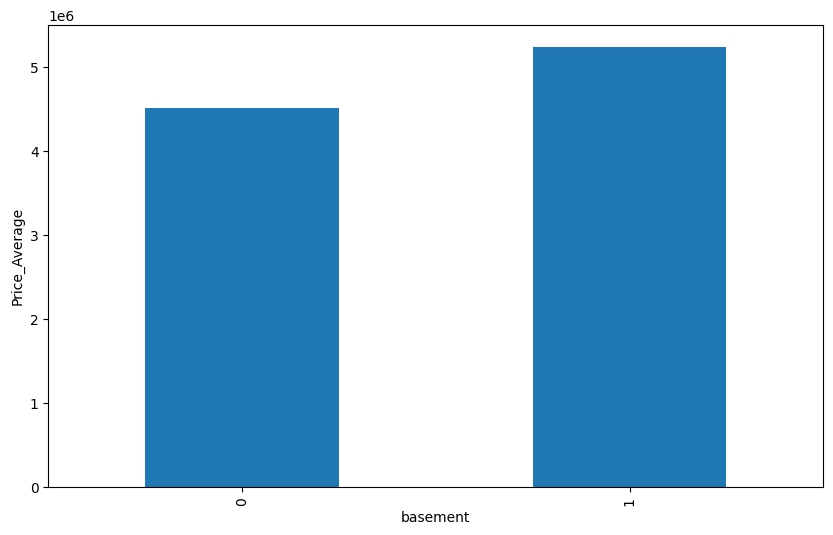

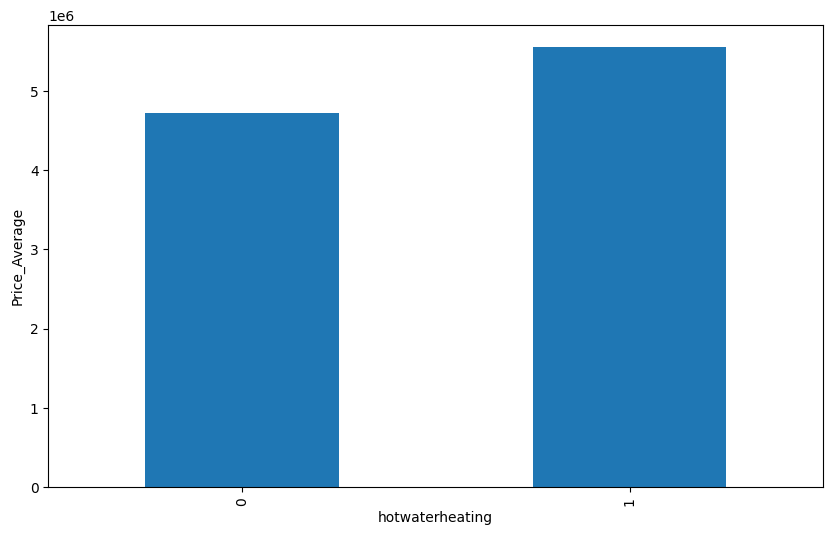

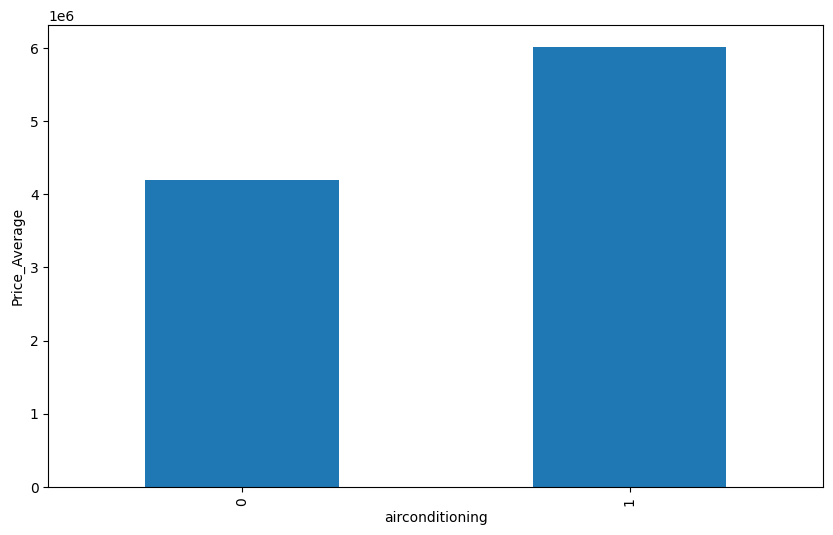

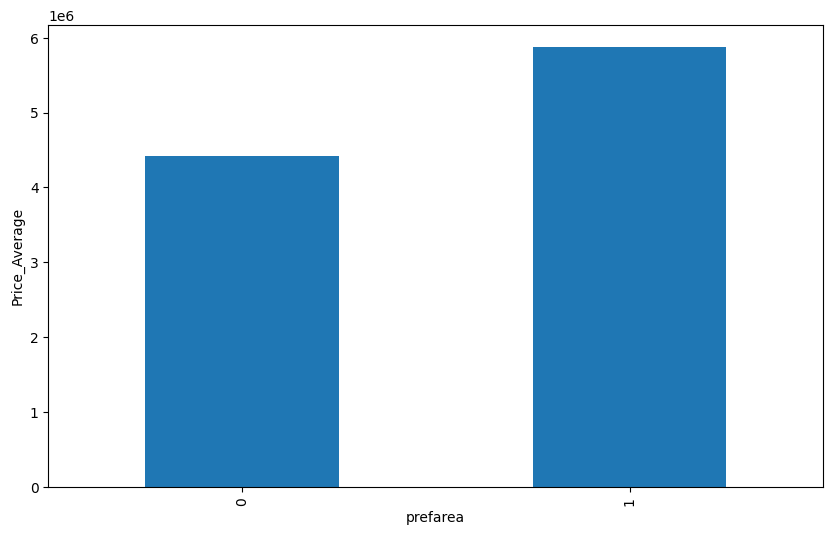

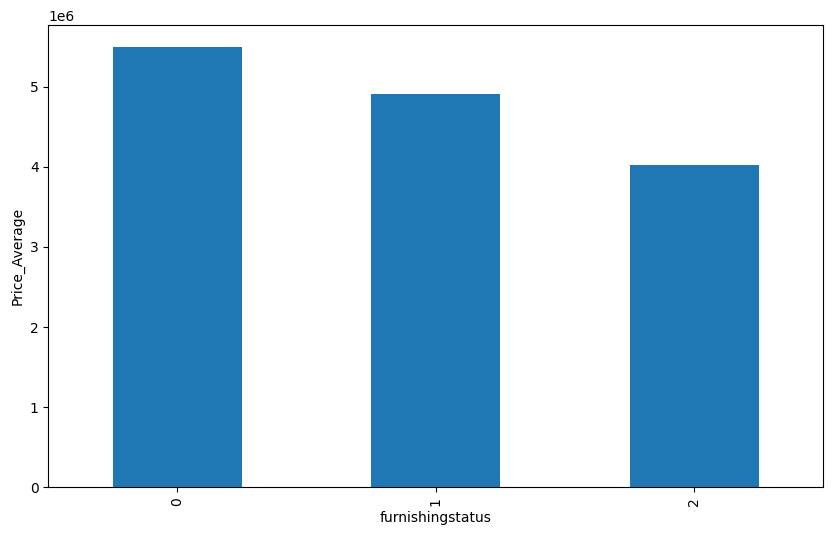

In [101]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
target="price"
for i in sampledataframe.columns:
  if i != target:
    if sampledataframe[i].nunique() < 16 :
      category_means = sampledataframe.groupby(i)[target].mean()
      category_means.plot(kind='bar')
      plt.xlabel(i)
      plt.ylabel('Price_Average')
      plt.show()
    elif sampledataframe[i].nunique() > 16 :
      GrandTotal=sampledataframe.sort_values(by=[i],ascending=False)
      GrandTotal_nonzero=GrandTotal[GrandTotal[i]!=0]
      GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)
      FinalDataFrame=GrandTotal_nonzero.groupby("Decile_rank").agg({target:['sum','count','mean'],i:['min','max','mean']})
      FinalDataFrame.columns=["".join(j) for j in list(FinalDataFrame.columns)]
      FinalDataFrame.reset_index(inplace=True)
      reg.fit(FinalDataFrame[[i+"mean"]],FinalDataFrame[target+"mean"])
      plt.title(i)
      plt.xlabel(i+"mean")
      plt.ylabel(target+"mean")
      plt.scatter(FinalDataFrame[[i+"mean"]],FinalDataFrame[target+"mean"],color="red",marker="+")
      plt.plot(FinalDataFrame[i+"mean"],reg.predict(FinalDataFrame[[i+"mean"]]),color='blue')
      plt.show()

In [102]:
sampledataframe.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price
0,7420,4,2,3,2,1,0,0,0,1,1,0,13300000
1,8960,4,4,4,3,1,0,0,0,1,0,0,12250000
2,9960,3,2,2,2,1,0,1,0,0,1,1,12250000
3,7500,4,2,2,3,1,0,1,0,1,1,0,12215000
4,7420,4,1,2,2,1,1,1,0,1,0,0,11410000


#Train the model

> Add blockquote



In [113]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
import pickle


X, y = sampledataframe.drop('price', axis=1), sampledataframe[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
with open('House_Predictions.pkl', 'wb') as f:
    pickle.dump(my_model, f)

In [111]:
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 910582.878649635
